In [16]:
import scvelo as scv
import cellrank as cr

In [17]:
adata = cr.datasets.pancreas_preprocessed("../example.h5ad")
adata

AnnData object with n_obs × n_vars = 2531 × 2000
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'diffmap_evals', 'iroot', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 

In [18]:
adata[0,0]

View of AnnData object with n_obs × n_vars = 1 × 1
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'diffmap_evals', 'iroot', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t'

In [19]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
k

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  


((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))

In [20]:
k.compute_projection(basis="umap")

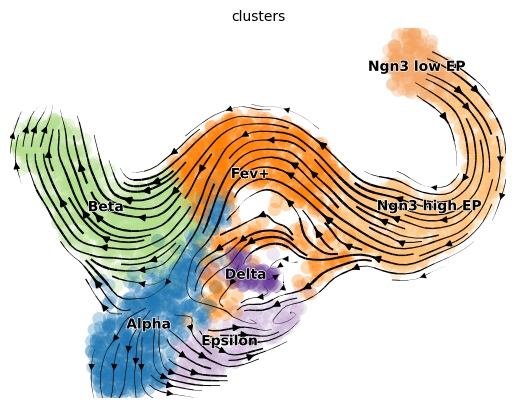

In [21]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap")

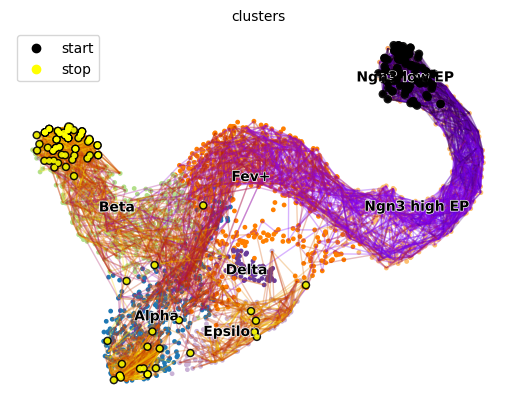

In [22]:
k.plot_random_walks(
    100,
    start_ixs={"clusters": "Ngn3 low EP"},
    max_iter=100,
    show_progress_bar=False,
    ixs_legend_loc="best",
    seed=42,
)


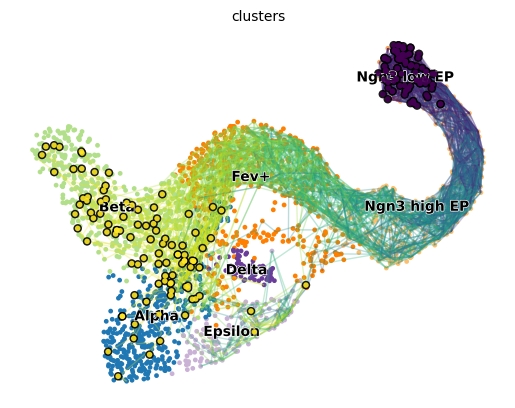

In [23]:
k.plot_random_walks(
    100,
    start_ixs={"clusters": "Ngn3 low EP"},
    stop_ixs={"clusters": ["Alpha", "Beta"]},
    max_iter=100,
    successive_hits=5,
    show_progress_bar=False,
    cmap="viridis",
    seed=42,
)

In [24]:
cr.tl.terminal_states(adata, cluster_key="clusters", weight_connectivities=0.2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


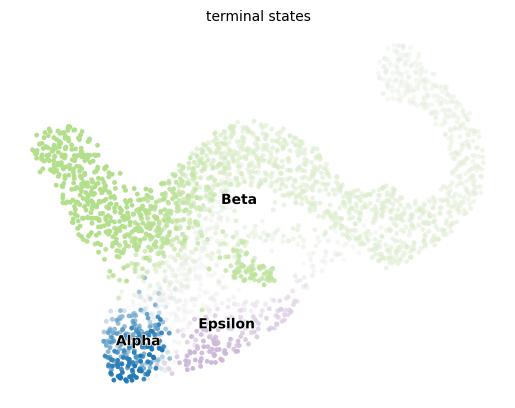

In [25]:
cr.pl.terminal_states(adata)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


  0%|          | 0/2531 [00:00<?, ?cell/s]

  0%|          | 0/2531 [00:00<?, ?cell/s]

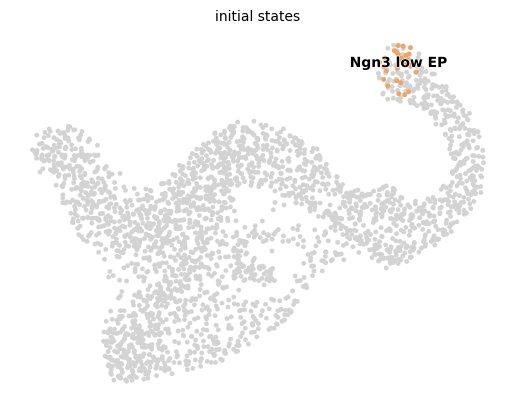

In [26]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


  0%|          | 0/3 [00:00<?, ?/s]

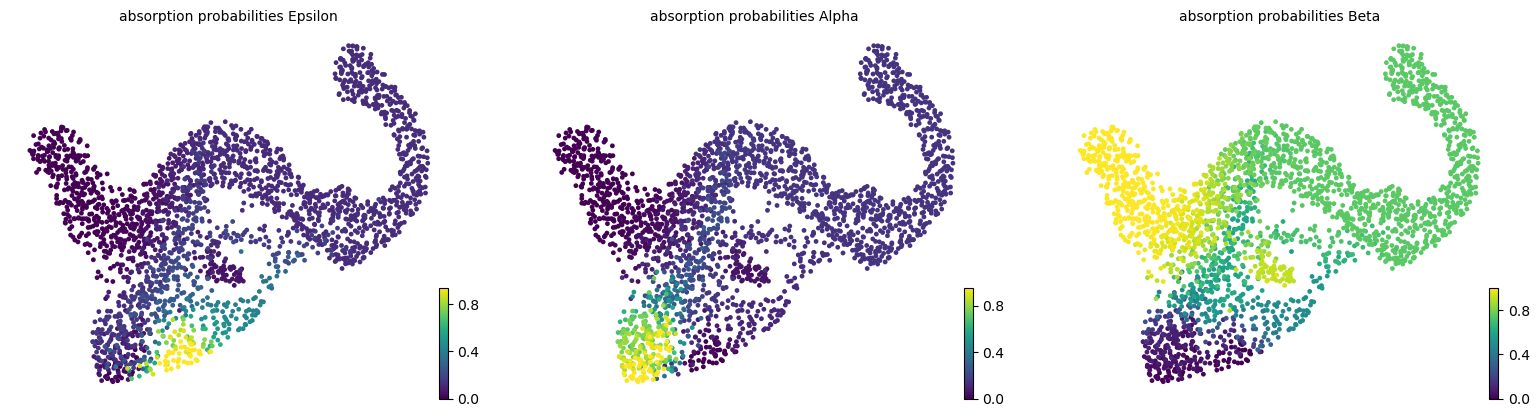

In [27]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [31]:
print("""
AnnData object with n_obs × n_vars = 2531 × 2000
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'diffmap_evals', 'iroot', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'
""")


AnnData object with n_obs × n_vars = 2531 × 2000
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'dpt_pseudotime'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'diffmap_evals', 'iroot', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'Ms', 'Mu', 'fit_t',

In [33]:
adata.obs['terminal_states']

index
AAACCTGAGAGGGATA-1-3    NaN
AAACCTGAGGCAATTA-1-3    NaN
AAACCTGGTAAGTGGC-1-3    NaN
AAACCTGTCCCTCTTT-1-3    NaN
AAACGGGAGTAGCGGT-1-3    NaN
                       ... 
TTTGGTTTCCTTTCGG-1-3    NaN
TTTGTCAAGAATGTGT-1-3    NaN
TTTGTCAAGTGACATA-1-3    NaN
TTTGTCATCGAATGCT-1-3    NaN
TTTGTCATCTGTTTGT-1-3    NaN
Name: terminal_states, Length: 2531, dtype: category
Categories (3, object): ['Epsilon', 'Alpha', 'Beta']

In [40]:
k

((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))

In [51]:
k.__dict__

{'_op_name': '+',
 '_transition_matrix': <2531x2531 sparse matrix of type '<class 'numpy.float64'>'
 	with 102924 stored elements in Compressed Sparse Row format>,
 '_backward': False,
 '_compute_cond_num': False,
 '_cond_num': None,
 '_params': {},
 '_normalize': True,
 '_parent': (0.3 * ((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))),
 '_kexprs': [(0.8 * <VelocityKernel>), (0.2 * <ConnectivityKernel>)],
 '_fn': <cellrank.tl.kernels._base_kernel.Reductor at 0x7fb675508950>}

In [39]:
k._transition_matrix

<2531x2531 sparse matrix of type '<class 'numpy.float64'>'
	with 102924 stored elements in Compressed Sparse Row format>

In [50]:
0.7 * k + 0.3 * k

((0.7 * ((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))) + (0.3 * ((0.8 * <VelocityKernel>) + (0.2 * <ConnectivityKernel>))))

# Goal ATAC+RNA

In [ ]:
k_v = cr.tl.kernels.VelocityKernel(adata_multivelo)
k_rna = cr.tl.kernels.ConnectivityKernel(adata_rna)
k_atac = cr.tl.kernels.ConnectivityKernel(adata_atac)

k = 0.5 * k_v + 0.3 * k_rna + 0.2 * k_atac

# or even our own matrix: cr.tl.kernels.PrecomputedKernel([...])